# Communicate Data Findings Project


# Ford GoBike System

# Data Wrangling

# Gather: 

In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import figure
from matplotlib.pyplot import figure
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import seaborn as sb
from matplotlib.pyplot import figure
%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\Manaralbogamii\Desktop\project7\201902-fordgobike-tripdata.csv')
print(data.shape)
data.head(4)

(183412, 16)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No


# Assess:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
data.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [5]:
#check duplicated record
data.duplicated().sum()

0

In [6]:
data.sample(4)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
81375,353,2019-02-18 13:25:56.9030,2019-02-18 13:31:50.1990,286.0,San Carlos St at 11th St,37.336466,-121.876613,309.0,San Jose City Hall,37.337391,-121.886995,6345,Subscriber,1986.0,Male,Yes
154979,340,2019-02-06 09:13:19.0980,2019-02-06 09:18:59.4820,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,256.0,Hearst Ave at Euclid Ave,37.875112,-122.260553,4645,Subscriber,1999.0,Male,No
42759,300,2019-02-22 17:19:28.4700,2019-02-22 17:24:28.6520,25.0,Howard St at 2nd St,37.787522,-122.397405,343.0,Bryant St at 2nd St,37.783172,-122.393572,1393,Subscriber,1994.0,Male,No
49031,310,2019-02-22 04:40:21.6280,2019-02-22 04:45:32.1870,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,9.0,Broadway at Battery St,37.798572,-122.400869,5360,Subscriber,1956.0,Male,No


# Cleaning

In [7]:
data.start_time = pd.to_datetime(data.start_time)
data.end_time = pd.to_datetime(data.end_time)


In [8]:
print(data.start_time.dtype)
print(data.end_time.dtype)

datetime64[ns]
datetime64[ns]


In [9]:
data = data.dropna()

In [10]:
data.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [11]:

data['start_of_weekday'] = data['start_time'].dt.strftime('%a')


In [12]:
data['start_hour'] = data['start_time'].dt.hour

In [13]:
data['end_hour'] = data['end_time'].dt.hour

In [14]:
data['duration_minites'] = data['duration_sec']/60

In [15]:
data['age_member'] = 2021 - data['member_birth_year']

In [16]:
print(data.columns)

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip',
       'start_of_weekday', 'start_hour', 'end_hour', 'duration_minites',
       'age_member'],
      dtype='object')


In [17]:
data.sample(100)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_of_weekday,start_hour,end_hour,duration_minites,age_member
129010,586,2019-02-10 11:45:40.711,2019-02-10 11:55:27.023,58.0,Market St at 10th St,37.776619,-122.417385,74.0,Laguna St at Hayes St,37.776435,...,5475,Subscriber,1998.0,Female,No,Sun,11,11,9.766667,23.0
162882,96,2019-02-05 10:05:37.159,2019-02-05 10:07:13.346,277.0,Morrison Ave at Julian St,37.333658,-121.908586,276.0,Julian St at The Alameda,37.332233,...,2159,Subscriber,1994.0,Male,Yes,Tue,10,10,1.600000,27.0
124705,352,2019-02-11 08:22:00.009,2019-02-11 08:27:53.002,268.0,Ellsworth St at Russell St,37.857490,-122.261578,241.0,Ashby BART Station,37.852477,...,2937,Customer,1974.0,Female,No,Mon,8,8,5.866667,47.0
75269,532,2019-02-19 09:13:10.557,2019-02-19 09:22:03.465,9.0,Broadway at Battery St,37.798572,-122.400869,50.0,2nd St at Townsend St,37.780526,...,5916,Subscriber,1987.0,Male,No,Tue,9,9,8.866667,34.0
3294,341,2019-02-28 17:25:15.024,2019-02-28 17:30:56.624,81.0,Berry St at 4th St,37.775880,-122.393170,93.0,4th St at Mission Bay Blvd S,37.770407,...,1522,Subscriber,1995.0,Male,No,Thu,17,17,5.683333,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97508,314,2019-02-15 08:55:46.183,2019-02-15 09:01:01.055,178.0,Broadway at 30th St,37.819381,-122.261928,211.0,Broadway at 40th St,37.827757,...,5928,Subscriber,1987.0,Male,No,Fri,8,9,5.233333,34.0
22475,175,2019-02-26 08:01:18.871,2019-02-26 08:04:14.445,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,241.0,Ashby BART Station,37.852477,...,5640,Subscriber,1988.0,Male,No,Tue,8,8,2.916667,33.0
112210,368,2019-02-12 15:59:34.804,2019-02-12 16:05:43.761,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,11.0,Davis St at Jackson St,37.797280,...,4976,Subscriber,1963.0,Male,No,Tue,15,16,6.133333,58.0
18711,666,2019-02-26 18:01:17.129,2019-02-26 18:12:24.036,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,58.0,Market St at 10th St,37.776619,...,6456,Subscriber,1991.0,Female,No,Tue,18,18,11.100000,30.0


In [18]:
data['start_of_weekday'].value_counts()

Thu    33712
Tue    30584
Wed    28426
Fri    27663
Mon    25641
Sun    14512
Sat    14414
Name: start_of_weekday, dtype: int64

In [19]:
data['start_hour'].value_counts()

17    20904
8     20227
18    16118
9     15204
16    13473
7     10231
19     9424
15     8646
12     8220
13     8098
10     7970
14     7677
11     7461
20     6211
21     4400
6      3293
22     2793
23     1572
0       893
5       866
1       525
2       355
4       227
3       164
Name: start_hour, dtype: int64

In [20]:
data['end_hour'].value_counts()

17    20322
8     19012
18    17468
9     16973
16    12526
19    10227
10     8538
7      8448
15     8292
12     8139
13     8086
14     7696
11     7212
20     6622
21     4701
22     3099
6      2802
23     1747
0       965
5       738
1       541
2       405
4       225
3       168
Name: end_hour, dtype: int64

In [21]:
data['age_member'].value_counts()

33.0     10214
28.0      9323
32.0      8967
31.0      8640
30.0      8484
         ...  
143.0        1
93.0         1
91.0         1
111.0        1
94.0         1
Name: age_member, Length: 75, dtype: int64

In [22]:
data['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

In [23]:
#clenning Drop other 
drop_other = data[data['member_gender']=='Other'].index
data = data.drop(index=drop_other)

In [24]:
#cheek remove other
data['member_gender'].value_counts()

Male      130500
Female     40805
Name: member_gender, dtype: int64

In [25]:
data['user_type'].value_counts()

Subscriber    155189
Customer       16116
Name: user_type, dtype: int64

# What is the structure of your dataset?

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171305 entries, 0 to 183411
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             171305 non-null  int64         
 1   start_time               171305 non-null  datetime64[ns]
 2   end_time                 171305 non-null  datetime64[ns]
 3   start_station_id         171305 non-null  float64       
 4   start_station_name       171305 non-null  object        
 5   start_station_latitude   171305 non-null  float64       
 6   start_station_longitude  171305 non-null  float64       
 7   end_station_id           171305 non-null  float64       
 8   end_station_name         171305 non-null  object        
 9   end_station_latitude     171305 non-null  float64       
 10  end_station_longitude    171305 non-null  float64       
 11  bike_id                  171305 non-null  int64         
 12  user_type       

In [27]:
# descriptive statistics for numeric variables
data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,start_hour,end_hour,duration_minites,age_member
count,171305.000000,171305.00000,171305.000000,171305.000000,171305.000000,171305.000000,171305.000000,171305.000000,171305.000000,171305.000000,171305.000000,171305.000000,171305.000000
mean,697.757981,138.70695,37.770629,-122.351657,136.304889,37.770831,-122.351225,4481.294136,1984.839351,13.451545,13.605546,11.629300,36.160649
std,1577.253741,111.71479,0.101225,0.118522,111.421147,0.101130,0.118088,1659.524197,10.116083,4.733722,4.747156,26.287562,10.116083
min,61.000000,3.00000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,0.000000,0.000000,1.016667,20.000000
25%,322.000000,47.00000,37.770083,-122.411901,44.000000,37.770407,-122.411647,3796.000000,1980.000000,9.000000,9.000000,5.366667,29.000000
50%,509.000000,104.00000,37.780760,-122.398279,100.000000,37.781010,-122.397437,4960.000000,1987.000000,14.000000,14.000000,8.483333,34.000000
75%,787.000000,239.00000,37.797280,-122.283127,237.000000,37.797320,-122.287610,5505.000000,1992.000000,17.000000,18.000000,13.116667,41.000000
max,84548.000000,398.00000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,23.000000,23.000000,1409.133333,143.000000


# What is/are the main feature(s) of interest in your dataset?

# What features in the dataset do you think will help support your investigation into your feature(s) of interest?

# Univariate Exploration

# How many users for the year?

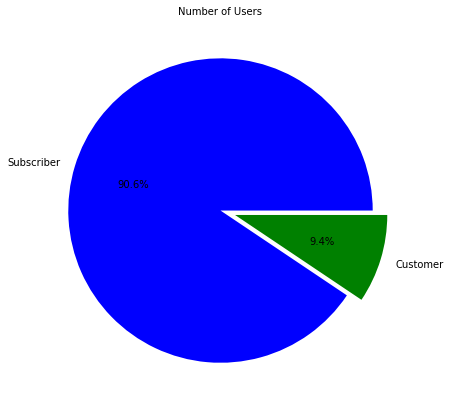

In [28]:
labels=data['user_type'].value_counts().index
colors=['blue','green']
explode=[0,0.1]
values=data['user_type'].value_counts().values
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Number of Users',fontsize=10)
plt.show()

# Distribution of Trip Durations

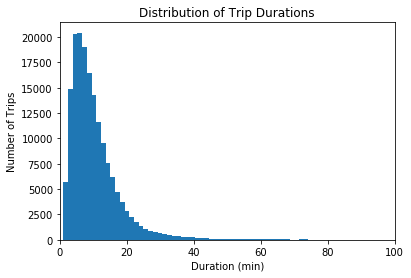

<Figure size 360x360 with 0 Axes>

In [29]:
plt.hist(data = data, x = 'duration_minites',bins=1000)
plt.title('Distribution of Trip Durations')
plt.xlim(xmin=0, xmax = 100)
plt.xlabel('Duration (min)')
plt.ylabel('Number of Trips')
plt.figure(figsize=[5,5])
plt.show()

# Daily bike Usage

In [30]:
start_of_weekday_counts = data['start_of_weekday'].value_counts()
start_of_weekday_counts

Thu    32984
Tue    30022
Wed    27825
Fri    27083
Mon    25106
Sun    14183
Sat    14102
Name: start_of_weekday, dtype: int64

Text(0, 0.5, 'Number of Users')

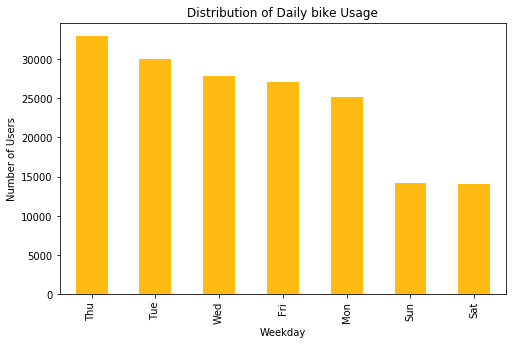

In [31]:
plt.figure(figsize=[8,5])
plt.title('Distribution of Daily bike Usage')
data['start_of_weekday'].value_counts().plot(kind='bar',color='#ffbb11');
plt.xlabel('Weekday')
plt.ylabel('Number of Users')


# hour bike Usage

In [32]:
data['start_hour'].value_counts()

17    20497
8     19881
18    15785
9     14907
16    13196
7     10055
19     9210
15     8468
12     8020
13     7906
10     7759
14     7494
11     7298
20     6085
21     4291
6      3258
22     2720
23     1530
0       869
5       860
1       509
2       340
4       215
3       152
Name: start_hour, dtype: int64

Text(0, 0.5, 'Number of Users')

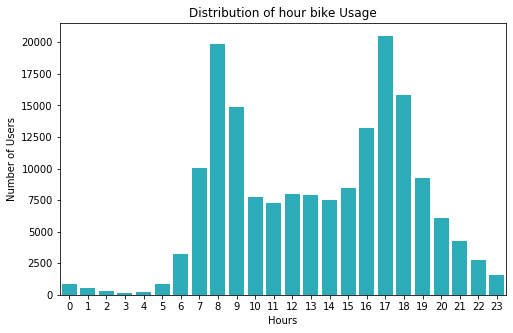

In [33]:
plt.figure(figsize=[ 8, 5]);
plt.title('Distribution of hour bike Usage')
sb.countplot(data=data, x='start_hour', color='#17becf');
plt.xlabel('Hours')
plt.ylabel('Number of Users')

# What is the Age Distribution?


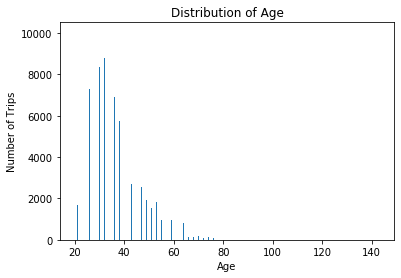

<Figure size 576x360 with 0 Axes>

In [34]:
plt.hist(data = data, x = 'age_member',bins=1000)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of Trips')
plt.figure(figsize=[8,5])
plt.show()

# What is the Gender Distribution?

In [35]:
data['member_gender'].value_counts()

Male      130500
Female     40805
Name: member_gender, dtype: int64

Text(0, 0.5, 'Number of Users')

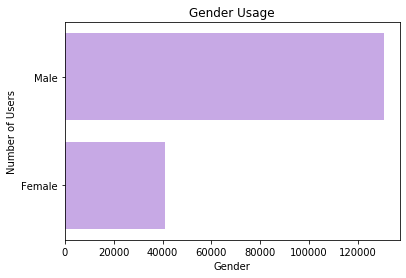

In [36]:
order_t = data['member_gender'].value_counts().index
plt.title('Gender Usage')
sb.countplot(data=data, y='member_gender', color='#c79fef', order=order_t);
plt.xlabel('Gender')
plt.ylabel('Number of Users')

# Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

# Of the features you investigated, were there any unusual distributions?


# Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

# Bivariate Exploration

# Customervs. Subscriber Usage by hour 

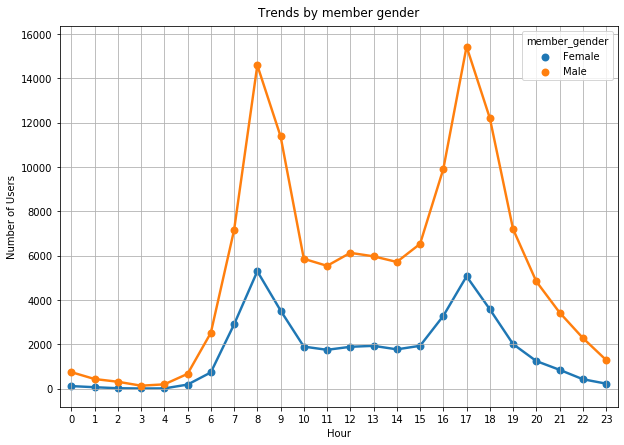

In [37]:

plt.figure(figsize=[ 10, 7]);
data_age_hour = data.groupby(['start_hour', 'member_gender']).size().reset_index()
x = sb.pointplot(data=data_age_hour,scale=.9, x='start_hour', y=0, hue = 'member_gender');
plt.title('Trends by member gender', y=1.01, fontsize=12)
plt.xlabel('Hour')
plt.ylabel('Number of Users');
plt.grid()


# what is distribution between duration_min and start_of_weekday?

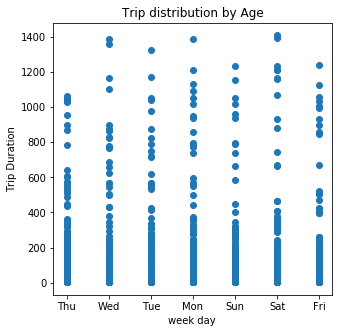

In [38]:

plt.figure(figsize=[5,5])
plt.scatter(data = data, x = 'start_of_weekday', y ='duration_minites')
plt.title('Trip distribution by Age')
plt.xlabel('week day ')
plt.ylabel('Trip Duration')
plt.show()


# Number of trips per week

Text(0.5, 1.0, 'Number of trips per week')

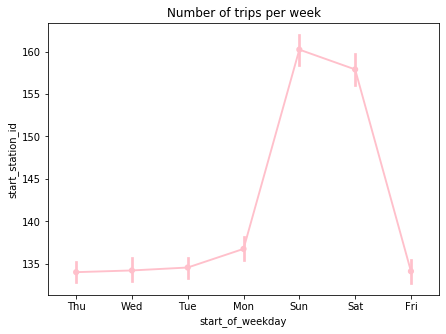

In [39]:

plt.figure(figsize = [7, 5]);
sns.pointplot(scale=.7, color='pink',x='start_of_weekday', y='start_station_id', data=data );
plt.title('Number of trips per week')

# Who is the longest time for the trip? Are they the subscribers or the customers?

In [40]:
user_trips=pd.DataFrame(data.groupby('user_type')['duration_minites'].sum())
user_trips

,duration_minites
user_type,
Customer,3.498549e+05
Subscriber,1.642302e+06


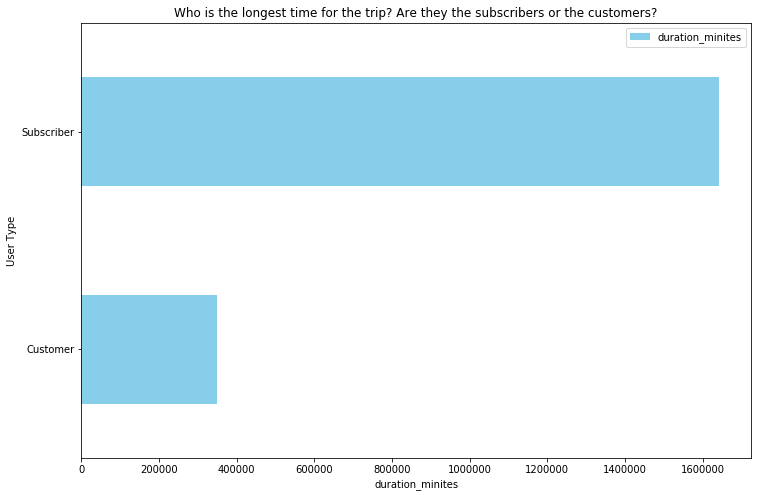

In [41]:

plt =user_trips.plot(kind='barh', figsize=(12,8),color='skyblue');

plt.set_title('Who is the longest time for the trip? Are they the subscribers or the customers?', fontsize=12)
plt.set_xlabel('duration_minites')
plt.set_ylabel('User Type');

# Relation between member genders and user types

Text(0, 0.5, 'count')

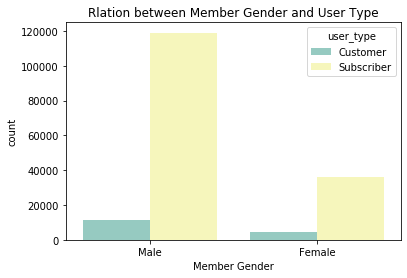

In [44]:
sb.countplot(data = data, x = 'member_gender', hue = 'user_type',palette="Set3");
plt.title('Rlation between Member Gender and User Type');
plt.xlabel('Member Gender')
plt.ylabel('count')

# Relation between age and duration

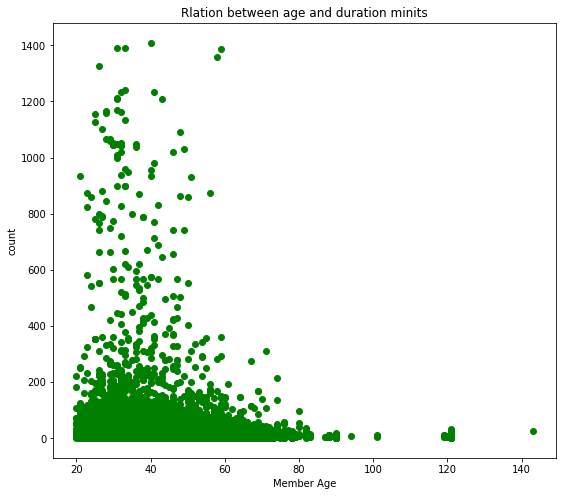

In [45]:
plt.figure(figsize =[9,8])
plt.scatter(x = data['age_member'], y = data['duration_minites'],color='green')
plt.title('Rlation between age and duration minits');
plt.xlabel('Member Age');
plt.ylabel('count');

# Multivariate exploration


# Weekly Usage for Member Gender and User Type

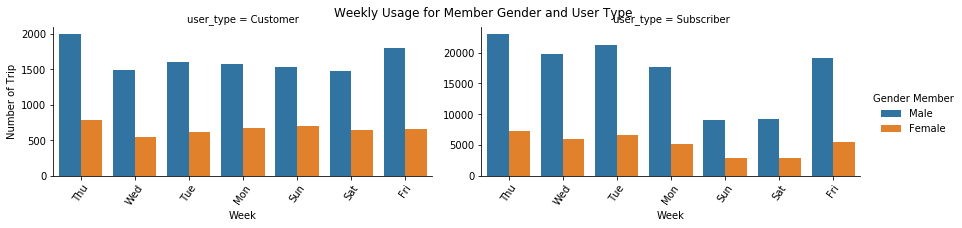

In [46]:
x= sb.catplot(data=data, x='start_of_weekday', col="user_type",sharey = False ,hue="member_gender", kind='count', height=3, aspect=2);
x.fig.suptitle('Weekly Usage for Member Gender and User Type');
x.set_xticklabels(rotation=55);
x.set_axis_labels("Week", "Number of Trip")
x._legend.set_title('Gender Member')

# hour Per User Type and Gender Member

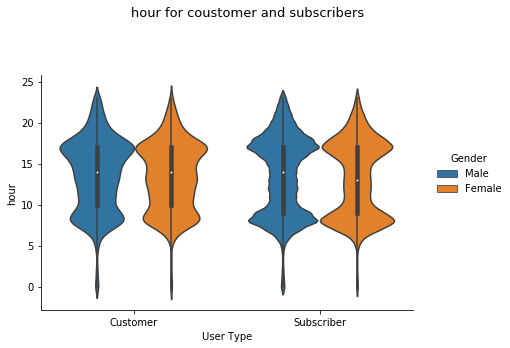

In [47]:
z = sb.catplot(data=data,height=4, aspect=1.5, x='user_type', y="start_hour", hue="member_gender", kind="violin");
z.set_axis_labels("User Type", "hour")
z._legend.set_title('Gender')
z.fig.suptitle('hour for coustomer and subscribers', y=1.2, fontsize=13);

# Relationship Between number of trips and Age Member

Text(0, 0.5, 'Number of Trips')

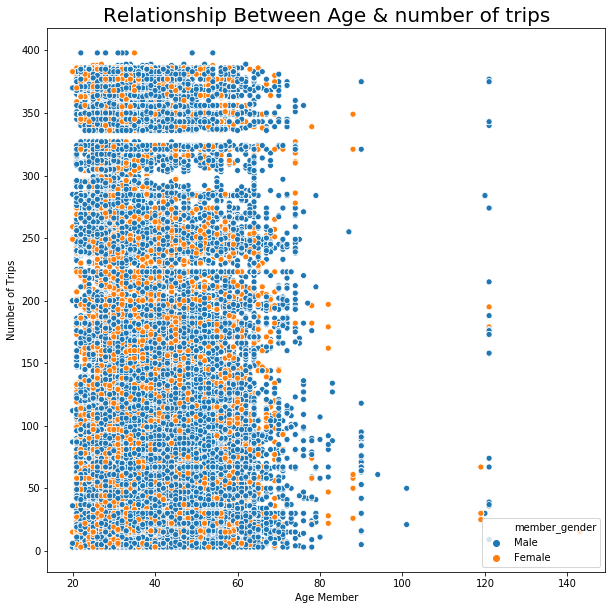

In [48]:
f, g = plt.subplots(figsize=(10,10))
g= sns.scatterplot(data=data, y=data['start_station_id'], x=data['age_member'], hue='member_gender')
plt.title('Relationship Between Age & number of trips', fontsize=20)
plt.xlabel('Age Member', fontsize=10); 
plt.ylabel('Number of Trips', fontsize=10)

# Findings exploratory visualizations:


In [49]:
data.to_csv('Master_cleanBike_system.csv')

In [ ]:
!jupyter nbconvert CommunicateDataFind.ipynb --to slides --post serve  --no-input --no-prompt